In [185]:
#! ipython suppress id=a26af182eb1f4597a9dbf174cdc570b9
#%pushd book-materials

from numpy.random import randn
import numpy as np
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80

In [186]:
#! ipython suppress id=5f3e64ebebd744a4a972fce4303d263a
path = "datasets/bitly_usagov/example.txt"

In [75]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [188]:
#! ipython verbatim id=74b843e3047b47d09a832031cd7a3753
import json
with open(path) as f:
    records = [json.loads(line) for line in f]
    

In [191]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [78]:
#! ipython allow_exceptions id=b0d4c36e296a48e4b5bfcc7b5a0b5926
time_zones = [rec["tz"] for rec in records]

KeyError: 'tz'

In [193]:
#! ipython id=9bcb262c06f14a3aa36dbd73c2f33444
time_zones = [rec["tz"] for rec in records if "tz" in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [80]:
#! ipython verbatim id=64a59d263c4c4e8ba0617426c1b21573
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [81]:
#! ipython verbatim id=b55b0800f7274320b5a7f97d93719a2d
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [82]:
#! ipython id=ba1751a9d2244f46841fd9afbae7aa04
counts = get_counts2(time_zones)
counts["America/New_York"]


1251

In [83]:
len(time_zones)

3440

In [84]:
#! ipython verbatim id=562d875fd9704dc6a3614303c9bc7a8e
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [85]:
#! ipython id=d061b4cb313c469e94543974462530ba
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [86]:
#! ipython id=ab2efb020a1846699974cea106f89ba2
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [87]:
#! ipython id=8abcc73b62f5486a9a448c1e742c5f92
frame = pd.DataFrame(records)

In [88]:
#! ipython id=58b54b37efa04ef9ad317bc29a1e8e2e
frame.info()
frame["tz"].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

In [89]:
#! ipython id=9694e9d51c944b9882129e348f79ae0c
tz_counts = frame["tz"].value_counts()
tz_counts.head()

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: tz, dtype: int64

In [90]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [91]:
#! ipython id=b445fbf49098428fbc93855c9aa93571
clean_tz = frame["tz"].fillna("Missing")
clean_tz[clean_tz == ""] = "Unknown"
tz_counts = clean_tz.value_counts()
tz_counts.head()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [92]:
#! ipython suppress id=f156ad96962842e6ae79658999ea7134
plt.figure(figsize=(10, 4))

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<AxesSubplot:>

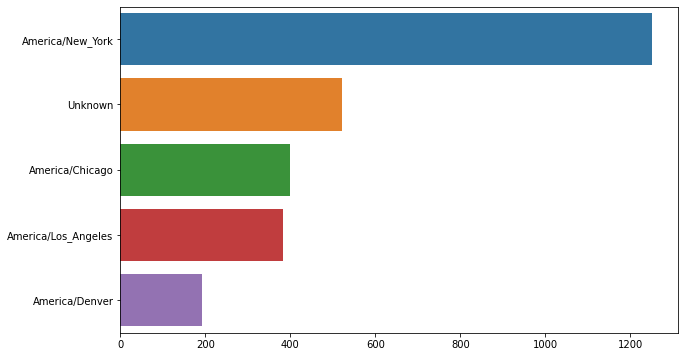

In [93]:
#! ipython id=ea12bafce448419c90a8a118e018458f
import seaborn as sns
subset = tz_counts.head()
#! figure,id=usa_gov_counts,title="Top time zones in the 1.usa.gov sample data"
sns.barplot(y=subset.index, x=subset.to_numpy())

In [94]:
#! ipython id=32e36ee621664722babaffe83900dff2
frame["a"][1]


'GoogleMaps/RochesterNY'

In [95]:
frame["a"][50]


'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [96]:
frame["a"][51][:50]  # long line

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [98]:
#! ipython id=973a67b5d25d41fb8c7d53ddcfbd747f
results = pd.Series([x.split()[0] for x in frame["a"].dropna()])
results.head(5)


0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [99]:
results.value_counts().head(8)

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [100]:
#! ipython id=7ef631a4289942378d19f5bc510b93e1
cframe = frame[frame["a"].notna()].copy()

In [101]:
#! ipython id=334e7d52678f48a28af3f14e7672b962
cframe["os"] = np.where(cframe["a"].str.contains("Windows"),
                        "Windows", "Not Windows")
cframe["os"].head(5)

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [102]:
#! ipython id=c8beb8e211f741bdb3680861c6bed49a
by_tz_os = cframe.groupby(["tz", "os"])

In [103]:
#! ipython id=e62bf85f81fd46f1a5d1f00399ae31f7
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head(10)

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [104]:
#! ipython id=684389ffe6c0421d9ced56415c1baeb9
indexer = agg_counts.sum("columns").argsort()
indexer.values[:10]


array([24, 20, 21, 92, 87, 53, 54, 57, 26, 55], dtype=int64)

In [105]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [106]:
#! ipython id=e861e46cf4b34f7690bbcbfbc490450c
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [107]:
#! ipython id=836cfdd2d671421f9e58b031cf142e3f
agg_counts.sum(axis="columns").nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [108]:
#! ipython suppress id=3edfe74f82f247cc99e3e4d7d4907a0c
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [109]:
#! ipython id=a194820b3f03419e844991ecdfaa3236
count_subset = count_subset.stack()
count_subset.name = "total"
count_subset = count_subset.reset_index()
count_subset.head(10)


,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


<AxesSubplot:xlabel='total', ylabel='tz'>

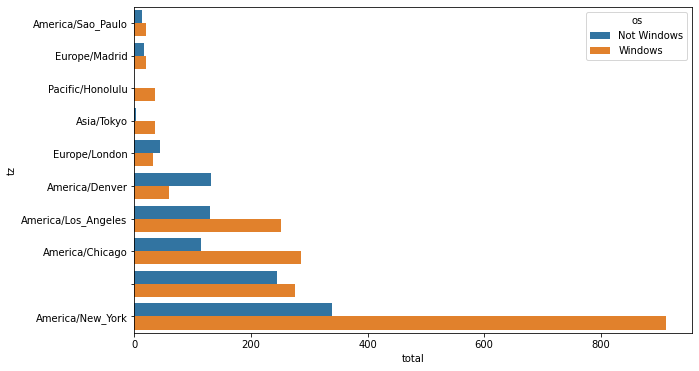

In [110]:
#! figure,id=usa_gov_tz_os,title="Top time zones by Windows and non-Windows users"
sns.barplot(x="total", y="tz", hue="os",  data=count_subset)

In [114]:
#! ipython verbatim id=1cf7faf398ca47e2b0c97b72beff6256
def norm_total(group):
    group["normed_total"] = group["total"] / group["total"].sum()
    return group

results = count_subset.groupby("tz").apply(norm_total)
results

,tz,os,total,normed_total
0,America/Sao_Paulo,Not Windows,13.0,0.393939
1,America/Sao_Paulo,Windows,20.0,0.606061
2,Europe/Madrid,Not Windows,16.0,0.457143
3,Europe/Madrid,Windows,19.0,0.542857
4,Pacific/Honolulu,Not Windows,0.0,0.000000
5,Pacific/Honolulu,Windows,36.0,1.000000
6,Asia/Tokyo,Not Windows,2.0,0.054054
7,Asia/Tokyo,Windows,35.0,0.945946
8,Europe/London,Not Windows,43.0,0.581081
9,Europe/London,Windows,31.0,0.418919


In [112]:
#! ipython suppress id=e7e063a913d244ff939d923e84f2f905
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='normed_total', ylabel='tz'>

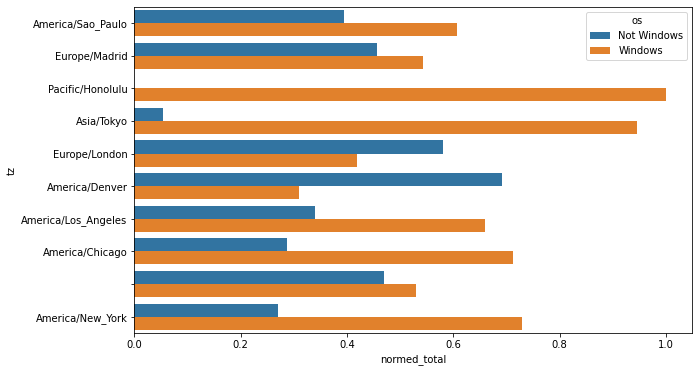

In [113]:
#! ipython id=512403c2efd149b1be89649e70dde50a
#! figure,id=usa_gov_tz_os_normed,title="Percentage Windows and non-Windows users in top occurring time zones"
sns.barplot(x="normed_total", y="tz", hue="os",  data=results)

In [115]:
#! ipython id=8e6df52dcfd144489941522b36b5a32a
g = count_subset.groupby("tz")
results2 = count_subset["total"] / g["total"].transform("sum")
results2

0     0.393939
1     0.606061
2     0.457143
3     0.542857
4     0.000000
5     1.000000
6     0.054054
7     0.945946
8     0.581081
9     0.418919
10    0.691099
11    0.308901
12    0.340314
13    0.659686
14    0.287500
15    0.712500
16    0.470250
17    0.529750
18    0.270983
19    0.729017
Name: total, dtype: float64

In [116]:
#! ipython verbatim id=f5f892f460124f2499e6e040ad28239a
unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table("datasets/movielens/users.dat", sep="::",
                      header=None, names=unames, engine="python")

rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table("datasets/movielens/ratings.dat", sep="::",
                        header=None, names=rnames, engine="python")

mnames = ["movie_id", "title", "genres"]
movies = pd.read_table("datasets/movielens/movies.dat", sep="::",
                       header=None, names=mnames, engine="python")

In [117]:
#! ipython id=c53d153be32f4a31af7adcc70ba414a6
users.head(5)


,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [118]:
ratings.head(5)


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [119]:
movies.head(5)


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [120]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [123]:
#! ipython id=326328c171c349389adb61b8e687355e
data = pd.merge(pd.merge(ratings, users), movies)
data


,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [57]:
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [58]:
#! ipython id=e5129c0aac3a400f91f247cb27ae9c3f
mean_ratings = data.pivot_table("rating", index="title",
                                columns="gender", aggfunc="mean")
mean_ratings.head(5)

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [124]:
#! ipython id=3e174af9b5e342b38519d1b0ce2802a4
ratings_by_title = data.groupby("title").size()
ratings_by_title.head()



title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [125]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [126]:
#! ipython id=083e410e3d7445baaddbb46d6760c956
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M,diff
title,,,
"'burbs, The (1989)",2.793478,2.962085,0.168607
10 Things I Hate About You (1999),3.646552,3.311966,-0.334586
101 Dalmatians (1961),3.791444,3.500000,-0.291444
101 Dalmatians (1996),3.240000,2.911215,-0.328785
12 Angry Men (1957),4.184397,4.328421,0.144024
...,...,...,...
Young Guns (1988),3.371795,3.425620,0.053825
Young Guns II (1990),2.934783,2.904025,-0.030758
Young Sherlock Holmes (1985),3.514706,3.363344,-0.151362


In [127]:
#! ipython suppress id=3920a865f3684ea6ab421a78dc0bcba4
mean_ratings = mean_ratings.rename(index={"Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)":
                           "Seven Samurai (Shichinin no samurai) (1954)"})

In [128]:
#! ipython id=a7405fad58a444e283a9c70691b2cd1a
top_female_ratings = mean_ratings.sort_values("F", ascending=False)
top_female_ratings.head()

gender,F,M,diff
title,,,
"Close Shave, A (1995)",4.644444,4.473795,-0.170650
"Wrong Trousers, The (1993)",4.588235,4.478261,-0.109974
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589,-0.108060
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075,-0.178032
Schindler's List (1993),4.562602,4.491415,-0.071187


In [129]:
#! ipython id=30f629f297c14048b06165aabeeed519
mean_ratings["diff"] = mean_ratings["M"] - mean_ratings["F"]

In [130]:
#! ipython id=efe335603fda4b159496e6fc78c8546b
sorted_by_diff = mean_ratings.sort_values("diff")
sorted_by_diff.head()


gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777


In [131]:
#! ipython id=d07b8e30ed1f4252a346e493dc775b4d
sorted_by_diff[::-1].head()

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787


In [132]:
#! ipython id=ce7c8a289d4942079cc643a7a30fe51d
rating_std_by_title = data.groupby("title")["rating"].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title.head()

title
'burbs, The (1989)                   1.107760
10 Things I Hate About You (1999)    0.989815
101 Dalmatians (1961)                0.982103
101 Dalmatians (1996)                1.098717
12 Angry Men (1957)                  0.812731
Name: rating, dtype: float64

In [133]:
#! ipython id=1b53af1f9cdc44c7ae77c8a6a10e5780
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

In [134]:
#! ipython id=79b147a65ea34ffcbe2d799331fcba6d
movies["genres"].head()


0     Animation|Children's|Comedy
1    Adventure|Children's|Fantasy
2                  Comedy|Romance
3                    Comedy|Drama
4                          Comedy
Name: genres, dtype: object

In [135]:
movies["genres"].head().str.split("|")


0     [Animation, Children's, Comedy]
1    [Adventure, Children's, Fantasy]
2                   [Comedy, Romance]
3                     [Comedy, Drama]
4                            [Comedy]
Name: genres, dtype: object

In [136]:
movies["genre"] = movies.pop("genres").str.split("|")
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [137]:
#! ipython id=3a1765e4004f467abde25424f4f68a19
movies_exploded = movies.explode("genre")
movies_exploded[:10]

,movie_id,title,genre
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's
1,2,Jumanji (1995),Fantasy
2,3,Grumpier Old Men (1995),Comedy
2,3,Grumpier Old Men (1995),Romance
3,4,Waiting to Exhale (1995),Comedy
3,4,Waiting to Exhale (1995),Drama


In [138]:
#! ipython id=12e06c516e144975bb4f6b33a19d3d17
ratings_with_genre = pd.merge(pd.merge(movies_exploded, ratings), users)
ratings_with_genre.iloc[0]
genre_ratings = (ratings_with_genre.groupby(["genre", "age"])
                 ["rating"].mean()
                 .unstack("age"))
genre_ratings[:10]

age,1,18,25,35,45,50,56
genre,,,,,,,
Action,3.506385,3.447097,3.453358,3.538107,3.528543,3.611333,3.610709
Adventure,3.449975,3.408525,3.443163,3.515291,3.528963,3.628163,3.649064
Animation,3.476113,3.624014,3.701228,3.740545,3.734856,3.780020,3.756233
Children's,3.241642,3.294257,3.426873,3.518423,3.527593,3.556555,3.621822
Comedy,3.497491,3.460417,3.490385,3.561984,3.591789,3.646868,3.650949
Crime,3.710170,3.668054,3.680321,3.733736,3.750661,3.810688,3.832549
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Fantasy,3.317647,3.353778,3.452484,3.482301,3.532468,3.581570,3.532700


In [139]:
#! ipython id=0b02ebafbf174f5b8b5b8487f314857a
!head -n 10 datasets/babynames/yob1880.txt

Mary,F,7065
Anna,F,2604
Emma,F,2003
Elizabeth,F,1939
Minnie,F,1746
Margaret,F,1578
Ida,F,1472
Alice,F,1414
Bertha,F,1320
Sarah,F,1288


In [140]:
#! ipython id=96d7c450b52749f6adc841c2ae245abf
names1880 = pd.read_csv("datasets/babynames/yob1880.txt",
                        names=["name", "sex", "births"])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [141]:
#! ipython id=93704598475f4ace96b41290892a8e22
names1880.groupby("sex")["births"].sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [144]:
#! ipython verbatim id=c1e1153045b246e6b46b81ed6d740365
pieces = []
for year in range(1880, 2011):
    path = f"datasets/babynames/yob{year}.txt"
    frame = pd.read_csv(path, names=["name", "sex", "births"])

    # Add a column for the year
    frame["year"] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [145]:
#! ipython id=2d1371e5fc5b4989bfdcb50c224f6ecf
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


1- Visualize a proporção de bebês com um nome específico (o seu próprio ou outro
nome) ao longo do tempo

2- Determinar a classificação relativa de um nome

3- Determine os nomes mais populares em cada ano ou os nomes cuja popularidade
avançou ou declinou mais

4- Analisar tendências em nomes: vogais, consoantes, comprimento, diversidade geral, mudanças no
ortografia, primeiras e últimas letras

5 Analisar fontes externas de tendências: nomes bíblicos, celebridades, dados demográficos
mudanças

In [151]:
#! ipython id=49e2f22b602741ff86b0e01def6297b5
total_births = names.pivot_table("births", index="year",
                                 columns="sex", aggfunc=sum)
total_births.tail()


sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

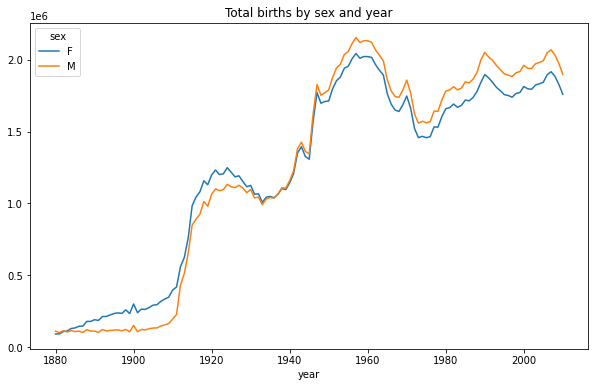

In [152]:
#! figure,id=baby_names_total_births,title="Total births by sex and year"
total_births.plot(title="Total births by sex and year")

In [153]:
#! ipython verbatim id=abb6e87b71ef43b0906c515cbf44ba33
def add_prop(group):
    group["prop"] = group["births"] / group["births"].sum()
    return group
names = names.groupby(["year", "sex"]).apply(add_prop)

In [154]:
#! ipython id=af43bd66df8a464a9acf179ea1a2a724
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [155]:
#! ipython id=799eddd440ee4047ad4dc571bd534914
names.groupby(["year", "sex"])["prop"].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [162]:
#! ipython id=d7cdfcaeec094222850cbd0a754e062d
def get_top1000(group):
    return group.sort_values("births", ascending=False)[:1000]
grouped = names.groupby(["year", "sex"])
top1000 = grouped.apply(get_top1000)
# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [159]:

places=[]
for year, group in names.groupby(['year', 'sex']):
    places.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(places, ignore_index=True)


In [160]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [163]:
#! ipython id=b817c8be4dcf441d826d41f0a679a8f7
top1000 = top1000.reset_index(drop=True)

In [164]:
#! ipython id=4018f9a519914774bfd558cd9ebfc13b
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [165]:
#! ipython id=df3701a69ebd4b3cbc438de86d549d93
#Analyzing Naming Trends
boys = top1000[top1000["sex"] == "M"]
girls = top1000[top1000["sex"] == "F"]

In [166]:
#! ipython id=e8e5983e77f741d7b1ad8fe607c9b869
total_births = top1000.pivot_table("births", index="year",
                                   columns="name",
                                   aggfunc=sum)

In [167]:
#! ipython id=ec63edf8240a4b739fbf6fd57e6b3c15
total_births.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

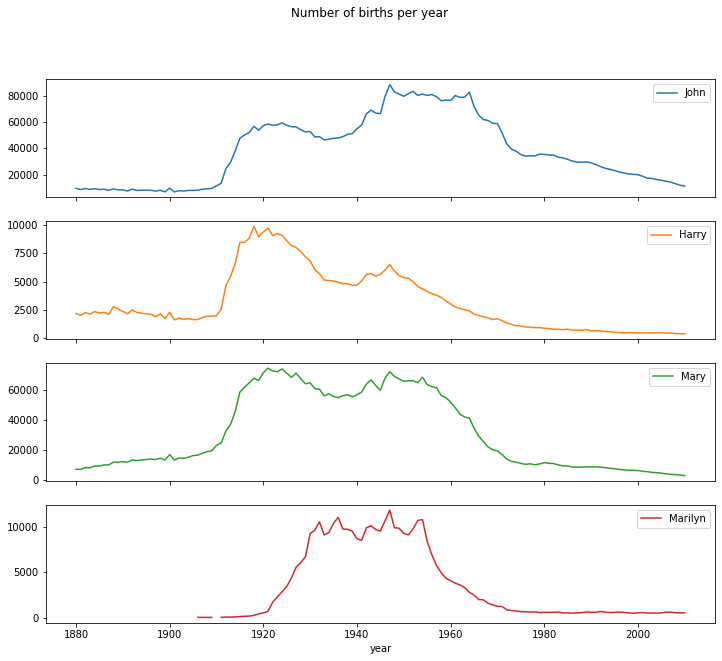

In [168]:
subset = total_births[["John", "Harry", "Mary", "Marilyn"]]
#! figure,id=baby_names_some_names,title="A few boy and girl names over time"
subset.plot(subplots=True, figsize=(12, 10),
            title="Number of births per year")

In [170]:
#! ipython suppress id=4353ea3630a8454b94c5093acfb6e8d9
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [172]:
#! ipython id=686e195247ca4394b0b8047c4019297c
#Measuring the increase in naming diversity
table = top1000.pivot_table("prop", index="year",
                            columns="sex", aggfunc=sum)
table

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2006,0.753153,0.860368
2007,0.745959,0.855159
2008,0.740933,0.850003


<AxesSubplot:title={'center':'Sum of table1000.prop by year and sex'}, xlabel='year'>

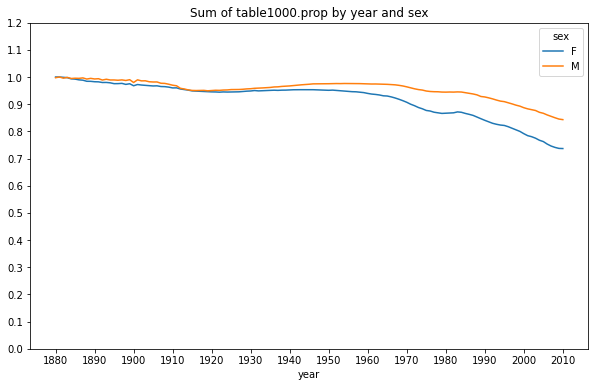

In [174]:
#! figure,id=baby_names_tot_prop,title="Proportion of births represented in top one thousand names by sex"
table.plot(title="Sum of table1000.prop by year and sex",
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880,2020,10))

In [175]:
#! ipython id=900fa540badb4cb9be8210d13b2ebee5
df = boys[boys["year"] == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [176]:
#! ipython id=4410fdd6262e462e982a01a98d55b34e
prop_cumsum = df["prop"].sort_values(ascending=False).cumsum()
prop_cumsum[:10]


260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [177]:
prop_cumsum.searchsorted(0.5)

116

In [178]:
#! ipython id=e7b5a7c97cb34f8487bdd77ead95eec7
df = boys[boys.year == 1900]
in1900 = df.sort_values("prop", ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1

25

In [179]:
#! ipython verbatim id=3275861aaba4432a8159d7004efee61a
def get_quantile_count(group, q=0.5):
    group = group.sort_values("prop", ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)
diversity = diversity.unstack()

In [180]:
#! ipython suppress id=a1adda1ceb0e4783ba0f3709016bede2
fig = plt.figure()

<Figure size 720x432 with 0 Axes>

In [181]:
#! ipython id=d194e4ae2a2b417aaedec5dcbc12d3a5
diversity.head()


sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<AxesSubplot:title={'center':'Number of popular names in top 50%'}, xlabel='year'>

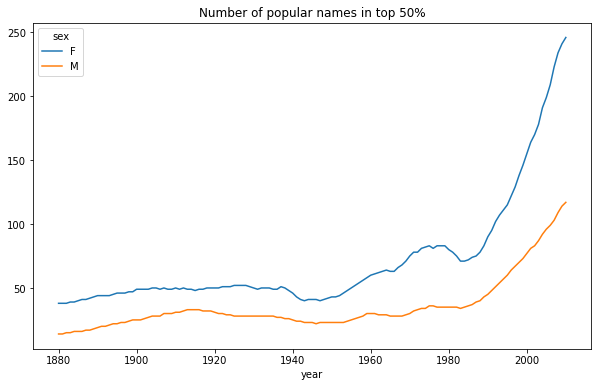

In [194]:
#! figure,id=baby_names_diversity_fig,title="Plot of diversity metric by year"
diversity.plot(title="Number of popular names in top 50%")

In [195]:
#! ipython verbatim id=086dc90d927b41e99f9af7ecd87aadee
def get_last_letter(x):
    return x[-1]

last_letters = names["name"].map(get_last_letter)
last_letters.name = "last_letter"

table = names.pivot_table("births", index=last_letters,
                          columns=["sex", "year"], aggfunc=sum)

In [196]:
#! ipython id=81379828617f46a8b289d83319498423
subtable = table.reindex(columns=[1910, 1960, 2010], level="year")
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [198]:
#! ipython id=cd458b92c4e14381a5380abc577f750a
subtable.sum()


sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [199]:
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
...               ...       ...       ...       ...       ...       ...
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

[26 rows x 6 columns]

<AxesSubplot:title={'center':'Female'}, xlabel='last_letter'>

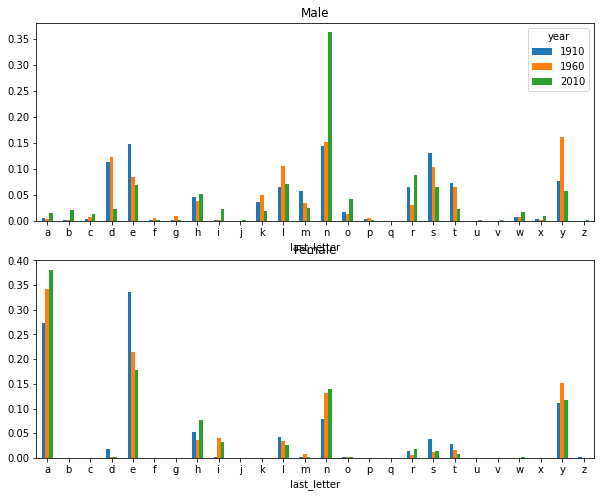

In [200]:
#! ipython verbatim id=cddad4c5c57d4c2b9a445f3eda5e625e
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop["M"].plot(kind="bar", rot=0, ax=axes[0], title="Male")
letter_prop["F"].plot(kind="bar", rot=0, ax=axes[1], title="Female",
                      legend=False)

In [201]:
#! ipython suppress id=dae34a4294ba4b7d8399d480222a8298
#! figure,id=baby_names_last_letter,title="Proportion of boy and girl names ending in each letter"
plt.subplots_adjust(hspace=0.25)

<Figure size 720x432 with 0 Axes>

In [202]:
#! ipython id=bf323785196547a0bed71781cfca7f5b
letter_prop = table / table.sum()

dny_ts = letter_prop.loc[["d", "n", "y"], "M"].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


In [203]:
#! ipython suppress id=44c3ae58c11e4723869a9a36aafa582f
plt.close("all")

In [204]:
#! ipython suppress id=ecaa55eb4a5a4c6b98547da72ce97cc7
fig = plt.figure()

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='year'>

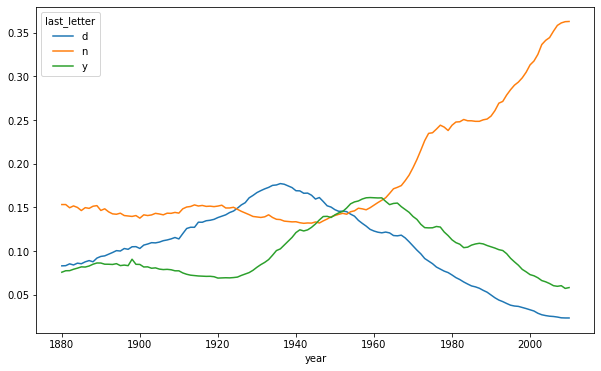

In [205]:
#! ipython id=18558439cbec454696a8d60c22092fee
#! figure,id=baby_names_letter_over_time,title="Proportion of boys born with names ending in d/n/y over time"
dny_ts.plot()

In [206]:
#! ipython id=1e66b95ed2d74763b32127da7c80ec51
all_names = pd.Series(top1000["name"].unique())
lesley_like = all_names[all_names.str.contains("Lesl")]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [207]:
#! ipython id=09ef1cec057c4361a6a765175b169d98
filtered = top1000[top1000["name"].isin(lesley_like)]
filtered.groupby("name")["births"].sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [208]:
#! ipython id=d4f30978887e471f9d5364c31a608faa
table = filtered.pivot_table("births", index="year",
                             columns="sex", aggfunc="sum")
table = table.div(table.sum(axis="columns"), axis="index")
table.tail()


sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


In [209]:
#! ipython suppress id=553d5251c8d84a7b93a66b0908bd7709
fig = plt.figure()

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='year'>

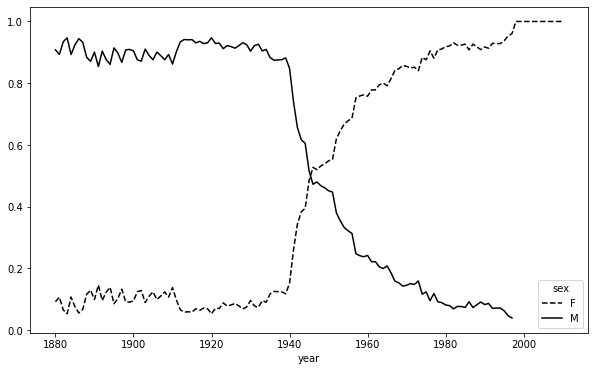

In [210]:
#! ipython id=e706bc2402d645b58fdf4bdf78db9844
#! figure,id="baby_names_lesley",title="Proportion of male/female Lesley-like names over time"
table.plot(style={"M": "k-", "F": "k--"})

In [211]:
#! ipython id=b35c37358f2744baa362accb22c7b050
import json
db = json.load(open("datasets/usda_food/database.json"))
len(db)

6636

In [213]:
#! ipython id=f04bd1e02f604ea4bd5d295855fd1289
db[0].keys()


dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [217]:
db[0]["nutrients"][0]


{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [215]:
nutrients = pd.DataFrame(db[0]["nutrients"])
nutrients.head(7)

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy


In [219]:
#! ipython id=292500dd7d93484c98341fb4c74fa514
info_keys = ["description", "group", "id", "manufacturer"]
info = pd.DataFrame(db, columns=info_keys)
info.head(5)


,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [220]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [221]:
#! ipython id=7ed01e31319d4bb6af5ef058fb0c7afc
pd.value_counts(info["group"])[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [222]:
nutrients

,value,units,description,group
0,25.180,g,Protein,Composition
1,29.200,g,Total lipid (fat),Composition
2,3.060,g,"Carbohydrate, by difference",Composition
3,3.280,g,Ash,Other
4,376.000,kcal,Energy,Energy
...,...,...,...,...
157,1.472,g,Serine,Amino Acids
158,93.000,mg,Cholesterol,Other
159,18.584,g,"Fatty acids, total saturated",Other
160,8.275,g,"Fatty acids, total monounsaturated",Other


In [223]:
#! ipython verbatim id=24c112fe1ee44d54bf747bae742861fc
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec["nutrients"])
    fnuts["id"] = rec["id"]
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [224]:
#! ipython id=185aa7bd01684e93a298345bbca145e5
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [225]:
#! ipython id=1c9de0a1f9734472a7ba009a638fa50e
nutrients.duplicated().sum()  # number of duplicates


14179

In [226]:
nutrients = nutrients.drop_duplicates()

In [227]:
#! ipython id=fad42e28e4ef433db2b3ac9a1310758a
col_mapping = {"description" : "food",
               "group"       : "fgroup"}
info = info.rename(columns=col_mapping, copy=False)
info.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [228]:
col_mapping = {"description" : "nutrient",
               "group" : "nutgroup"}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

,value,units,nutrient,nutgroup,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [229]:
#! ipython id=3d1bb6fec99b4df09611f192fbd12462
ndata = pd.merge(nutrients, info, on="id")
ndata.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutgroup      375176 non-null  object 
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [230]:
ndata.iloc[30000]

value                                             0.04
units                                                g
nutrient                                       Glycine
nutgroup                                   Amino Acids
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [231]:
#! ipython suppress id=02da7933628d4350b5c495755caed9a4
fig = plt.figure()

<Figure size 720x432 with 0 Axes>

<AxesSubplot:ylabel='fgroup'>

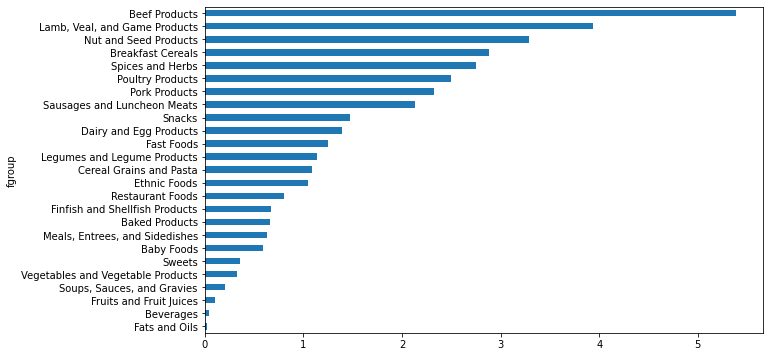

In [232]:
#! ipython id=276ba38a83974b82bbc4849eb024bcb7
result = ndata.groupby(["nutrient", "fgroup"])["value"].quantile(0.5)
#! figure,id=fig_wrangle_zinc,width=4in,title="Median zinc values by food group"
result["Zinc, Zn"].sort_values().plot(kind="barh")

In [233]:
#! ipython verbatim id=539c0a81efd34f95835032021f1e5ab6
by_nutrient = ndata.groupby(["nutgroup", "nutrient"])

def get_maximum(x):
    return x.loc[x.value.idxmax()]

max_foods = by_nutrient.apply(get_maximum)[["value", "food"]]

# make the food a little smaller
max_foods["food"] = max_foods["food"].str[:50]

In [234]:
#! ipython id=bdb361d50f794410823645a33be3c365
max_foods.loc["Amino Acids"]["food"]

nutrient
Alanine                            Gelatins, dry powder, unsweetened
Arginine                                Seeds, sesame flour, low-fat
Aspartic acid                                    Soy protein isolate
Cystine                 Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                    Soy protein isolate
Glycine                            Gelatins, dry powder, unsweetened
Histidine                 Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINAL RE
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTERNAT
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTERNAT
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Native
Methionine                     Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTERNAT
Proline                            Gelatins, dry powder, unsweetened
Serine            Soy pro

In [236]:
#lambda
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])
get_maximum = lambda x: x.loc[x.value.idxmax()]
get_minimum = lambda x: x.loc[x.value.idxmin()]
max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]
# make the food a little smaller
max_foods.food = max_foods.food.str[:50]

In [237]:
max_foods.loc['Amino Acids']['food']

nutrient
Alanine                            Gelatins, dry powder, unsweetened
Arginine                                Seeds, sesame flour, low-fat
Aspartic acid                                    Soy protein isolate
Cystine                 Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                    Soy protein isolate
Glycine                            Gelatins, dry powder, unsweetened
Histidine                 Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINAL RE
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTERNAT
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTERNAT
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Native
Methionine                     Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTERNAT
Proline                            Gelatins, dry powder, unsweetened
Serine            Soy pro

In [238]:
#! ipython id=1d39de88d04247a692ef7c90ac52edbc
fec = pd.read_csv("datasets/fec/P00000001-ALL.csv", low_memory=False)
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [239]:
#! ipython id=00bb57847d384a1c868ac10bdf94db5e
fec.iloc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                        50.0
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [241]:
#! ipython id=747ed603f23f442abe038ca6108295b6
unique_cands = fec["cand_nm"].unique()
unique_cands


array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [242]:
unique_cands[2]

'Obama, Barack'

In [243]:
#! ipython verbatim id=f3fee9f744a642bb93414dcdcc4b3eff
parties = {"Bachmann, Michelle": "Republican",
           "Cain, Herman": "Republican",
           "Gingrich, Newt": "Republican",
           "Huntsman, Jon": "Republican",
           "Johnson, Gary Earl": "Republican",
           "McCotter, Thaddeus G": "Republican",
           "Obama, Barack": "Democrat",
           "Paul, Ron": "Republican",
           "Pawlenty, Timothy": "Republican",
           "Perry, Rick": "Republican",
           "Roemer, Charles E. 'Buddy' III": "Republican",
           "Romney, Mitt": "Republican",
           "Santorum, Rick": "Republican"}

In [244]:
#! ipython id=b659a8f33d0d48adad4fca5927da7a48
fec["cand_nm"][123456:123461]


123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [245]:
fec["cand_nm"][123456:123461].map(parties)


123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [246]:
# Add it as a column
fec["party"] = fec["cand_nm"].map(parties)
fec["party"].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [247]:
#! ipython id=8d2df181b8d0474d9b3509df8c27c743
(fec["contb_receipt_amt"] > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [248]:
#! ipython id=6fcec3476c974121b94a2147252276ca
fec = fec[fec["contb_receipt_amt"] > 0]

In [250]:
#! ipython id=2f86e0fe1e334c6ab6597b4531d650a5
fec_mrbo = fec[fec["cand_nm"].isin(["Obama, Barack", "Romney, Mitt"])]

In [258]:
#! ipython id=5f3ce51804ef4ef29e4b443d69fc6e6d
fec["contbr_occupation"].value_counts()[:10]

RETIRED         233990
NOT PROVIDED     57151
ATTORNEY         34286
HOMEMAKER        29931
PHYSICIAN        23432
ENGINEER         14334
TEACHER          13990
CONSULTANT       13273
PROFESSOR        12555
NOT EMPLOYED      9828
Name: contbr_occupation, dtype: int64

In [259]:
#lambda
emp_mapping = {
'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
'INFORMATION REQUESTED' : 'NOT PROVIDED',
'SELF' : 'SELF-EMPLOYED',
'SELF EMPLOYED' : 'SELF-EMPLOYED',
}
# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [260]:
#! ipython verbatim id=c6c82bbba04f445282d55d072300889e
occ_mapping = {
   "INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
   "INFORMATION REQUESTED" : "NOT PROVIDED",
   "INFORMATION REQUESTED (BEST EFFORTS)" : "NOT PROVIDED",
   "C.E.O.": "CEO"
}

def get_occ(x):
    # If no mapping provided, return x
    return occ_mapping.get(x, x)

fec["contbr_occupation"] = fec["contbr_occupation"].map(get_occ)
# If no mapping provided, return x
#f = lambda x: occ_mapping.get(x, x)
#fec.contbr_occupation = fec.contbr_occupation.map(f)
#



In [261]:
#! ipython verbatim id=6e79332d5ea4476f89503731765aedc7
emp_mapping = {
   "INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
   "INFORMATION REQUESTED" : "NOT PROVIDED",
   "SELF" : "SELF-EMPLOYED",
   "SELF EMPLOYED" : "SELF-EMPLOYED",
}

def get_emp(x):
    # If no mapping provided, return x
    return emp_mapping.get(x, x)

fec["contbr_employer"] = fec["contbr_employer"].map(f)

In [262]:
#! ipython id=52c5ed9cbb6042a2a31d92b66349d3df
by_occupation = fec.pivot_table("contb_receipt_amt",

                                index="contbr_occupation",
                                columns="party", aggfunc="sum")
over_2mm = by_occupation[by_occupation.sum(axis="columns") > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
CEO,2074974.79,4211040.52
CONSULTANT,2459912.71,2544725.45
ENGINEER,951525.55,1818373.70
EXECUTIVE,1355161.05,4138850.09
HOMEMAKER,4248875.80,13634275.78
INVESTOR,884133.00,2431768.92
LAWYER,3160478.87,391224.32
MANAGER,762883.22,1444532.37


In [263]:
#! ipython suppress id=ce914115742b401dbe73c3a8574063d3
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<AxesSubplot:ylabel='contbr_occupation'>

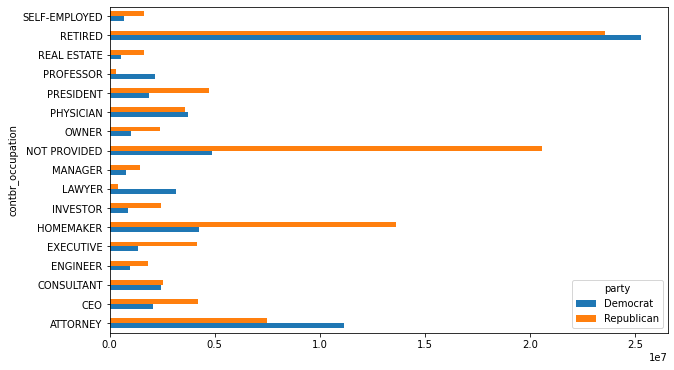

In [264]:
#! ipython id=33becfe73ad14bd584bf661685329273
#! figure,id=groupby_fec_occ_party,width=4.5in,title="Total donations by party for top occupations"
over_2mm.plot(kind="barh")

In [265]:
#! ipython verbatim id=3dcbd1e24a774aa0a87f1459733b8ecf
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)["contb_receipt_amt"].sum()
    return totals.nlargest(n)

In [266]:
#! ipython id=ed90d977b2e8476ab7a241886ac725ca
grouped = fec_mrbo.groupby("cand_nm")
grouped.apply(get_top_amounts, "contbr_occupation", n=7)


cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

In [267]:
grouped.apply(get_top_amounts, "contbr_employer", n=10)

cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                     

In [268]:
#! ipython id=9430750304c744018ebfe44fa7825f15
bins = np.array([0, 1, 10, 100, 1000, 10000,
                 100_000, 1_000_000, 10_000_000])
labels = pd.cut(fec_mrbo["contb_receipt_amt"], bins)
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64, right]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [269]:
#! ipython id=53f9ac1f658442ab824c5684308e083d
grouped = fec_mrbo.groupby(["cand_nm", labels])
grouped.size().unstack(level=0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


In [270]:
#! ipython suppress id=6e9668803e4f4b6ea96904c4ae9d7d1c
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [271]:
#! ipython id=94fab00fdb7847b88c42b8faba89c0b2
bucket_sums = grouped["contb_receipt_amt"].sum().unstack(level=0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis="columns"),
                              axis="index")
normed_sums


cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,0.000000
"(1000000, 10000000]",1.000000,0.000000


<AxesSubplot:ylabel='contb_receipt_amt'>

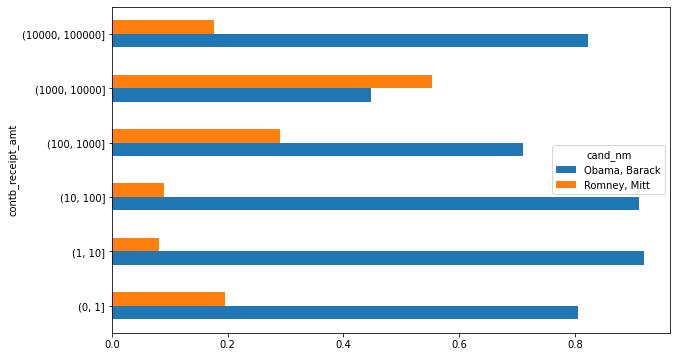

In [272]:
#! figure,id=fig_groupby_fec_bucket,width=4.5in,title="Percentage of total donations received by candidates for each donation size"
normed_sums[:-2].plot(kind="barh")

In [273]:
#! ipython id=bcffb8dcc3b741fe87058d44f39324f1
grouped = fec_mrbo.groupby(["cand_nm", "contbr_st"])
totals = grouped["contb_receipt_amt"].sum().unstack(level=0).fillna(0)
totals = totals[totals.sum(axis="columns") > 100000]
totals.head(10)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [274]:
#! ipython id=eda82c69272d44b3a8eb23c0adb6ede4
percent = totals.div(totals.sum(axis="columns"), axis="index")
percent.head(10)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224


In [121]:
#! ipython suppress id=c7894724cf8b4ce087cfee42b10068b3
%popd